My first Colab notebook

Import Libraries

In [0]:
%tensorflow_version 2.x

import  tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [20]:
print("TensorFlow version : " , tf.__version__)
print("Numpy version: ", np.__version__)

TensorFlow version :  2.2.0-rc2
Numpy version:  1.18.2


In [0]:

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import pandas as pd
csv_housefile = 'AmesHousing-05-2010.csv'
df_housing = pd.read_csv(csv_housefile)

In [29]:
pd.set_option('display.max_columns', None)  
df_housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2,528,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,13,527166040,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,180400
2,38,528112020,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,Ex,Y,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
3,56,528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
4,59,528292020,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500


In [30]:
df_housing[['Total Bsmt SF', 'Gr Liv Area']].isnull().values.any()
#this line checks if the given collumns caontain any null values


False

In [0]:
# Add new feature column Total SF = Total Bsmt SF + Gr Liv Area
df_housing['Total SF'] = df_housing['Total Bsmt SF'] + df_housing['Gr Liv Area']

In [32]:
 #see the basement and living area, total sf, and price columns
print(df_housing[['Total Bsmt SF', 'Gr Liv Area', 'Total SF', 'SalePrice']].head(5) )

   Total Bsmt SF  Gr Liv Area  Total SF  SalePrice
0           1080         1656      2736     215000
1            789         1465      2254     180400
2           1704         1704      3408     306000
3            860         1960      2820     216500
4            884         2035      2919     222500


In [0]:
# This function visualizes our data 
def visualize_data(x_vals, y_vals,
                   addn_x_vals=None, addn_y_vals=None, add_addn_reg_line=False):
  
  f, ax = plt.subplots(figsize=(8,8))
  #axis and figure
  plt.plot(x_vals, y_vals, 'ro')   # red dot for each data point
  # Optionally plot another set of data points in a different color and symbol
  if (addn_x_vals is not None):
    plt.plot(addn_x_vals, addn_y_vals, 'g^') # green triangles for additional data points
    # Optionally, plot a regression line.
    if (add_addn_reg_line):
      x_min_index = addn_x_vals.argmin()
      x_max_index = addn_x_vals.argmax()
      print(x_min_index,[addn_x_vals[x_min_index],addn_y_vals[x_min_index]] ) 
      print(x_max_index,[addn_x_vals[x_max_index],addn_y_vals[x_max_index]] ) 
      plt.plot([addn_x_vals[x_min_index],addn_y_vals[x_min_index]], 
               [addn_x_vals[x_max_index],addn_y_vals[x_max_index]], 
               'b-')  # draw a blue regression line
    
  plt.tick_params(axis='both', which='major', labelsize=14)
  
  plt.show()  # now plot the line showing the data and the optional line

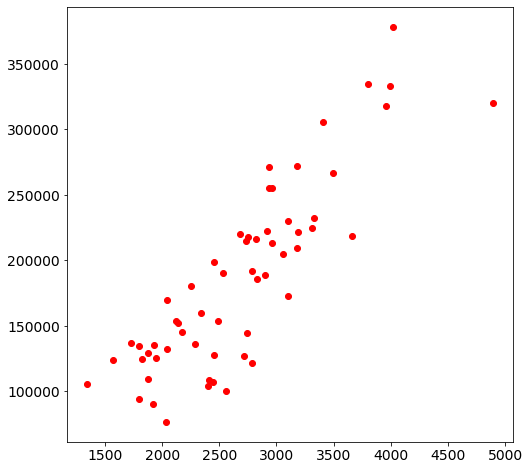

In [36]:
visualize_data(df_housing['Total SF'], df_housing['SalePrice'])

There seems to be a linear relationship between the size of the house (as shown in Total SF) and Price.

This suggests that we should perform Linear Regression. Where the relationship in the data is: y = mx + b.
Or in our case, Price = m * Total SF + b

we normalize we will reduce both qualtities to the same scale while preserving the differences between prices and sizes of homes.

In [0]:
# Scale data so SF and Sale Price are on similar scales with values 
#  from 0.0 to 1.0

from sklearn.preprocessing import MinMaxScaler

sf_scaler = MinMaxScaler()
sf_scaled = sf_scaler.fit_transform(df_housing['Total SF'].values.reshape(-1,1).astype(np.float64))
    
price_scaler = MinMaxScaler()
price_scaled = price_scaler.fit_transform(df_housing['SalePrice'].values.reshape(-1,1).astype(np.float64))

We create a sequential model where the output of one layer becomes the input of the next layer.

This model is a simple Neural Network that implements y = wx + bias, where w is a weight and bias is an offset.
Therefore the goal is to use our data to train the model and learn the best values for w and bias.



In [0]:
# Create model using the TensorFlow Keras library
model = tf.keras.Sequential()
#this ensures layers are added to the network sequentially
#below adds one neuron the network
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1,),
                                kernel_initializer='random_uniform',
                                bias_initializer='zeros'))
#units is number of dimensions inputed
#last two parameters are initializations of the two weights
#there are multiple activation functions
#input shape is a tuple, in this case it is only one collumn

In [0]:
# Compile model
optimizer = "sgd"
#stociatic gradient descent
model.compile(loss='mean_squared_error', optimizer=optimizer )
#this defines the loss function, and the optimizer adjusts the two weights accordingly

In [0]:
# Split the dataset into training dataset - 70%, Testing dataset - 30%
from sklearn.model_selection import train_test_split

sf_train_scaled, sf_test_scaled, price_train_scaled, price_test_scaled = train_test_split(sf_scaled, 
                                                    price_scaled, 
                                                    test_size=0.3, random_state=42)
#test size is usually 30 percent and random state =42 because it apparently
#this is a good number and reproduciblity is important for storing the same seed
#when generating random values


In [42]:
# Train model using data
initial_epochs = 8
batch_size = 10
train_hist = model.fit(sf_train_scaled, price_train_scaled, 
                       epochs=initial_epochs, batch_size=batch_size, verbose=1)
#verbose the amount of information that needs to be displayed
#number of cycles is dependent on you
#batch size is important number for gradient descent

Epoch 1/8
5/5 [==============================] - 0s 2ms/step - loss: 0.2361
Epoch 2/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1305
Epoch 3/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 4/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1448
Epoch 5/8
5/5 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 6/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1253
Epoch 7/8
5/5 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 8/8
5/5 [==============================] - 0s 2ms/step - loss: 0.0509


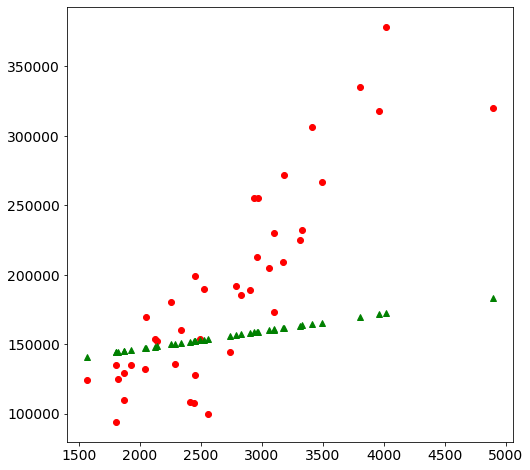

In [44]:
#  predict the price with our trained model
price_predicted_scaled =  model.predict(sf_train_scaled)
visualize_data(sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_train_scaled),
               sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_predicted_scaled),
               add_addn_reg_line=False)
#this parameter price_predicted_scaled is used to predict values based on our current model
#taking x axis as constant and y axis as target variable

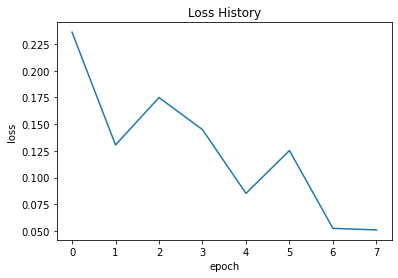

In [46]:
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

plot_loss(train_hist)

In [47]:
print(type(train_hist))

<class 'tensorflow.python.keras.callbacks.History'>


In [48]:
# Train model using data.  This time, train for additional epochs
# Also capture the changes over time in the history variable, train_hist_addn so we 
#   can see if loss is converging
addn_epochs = 1200
train_hist_addn =model.fit(sf_train_scaled, price_train_scaled,  
                     epochs=addn_epochs, verbose=1)

Epoch 1/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 2/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 3/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 4/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0562
Epoch 5/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 6/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 7/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 8/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 9/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 10/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 11/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 12/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 13/1200
2/2 [==============================

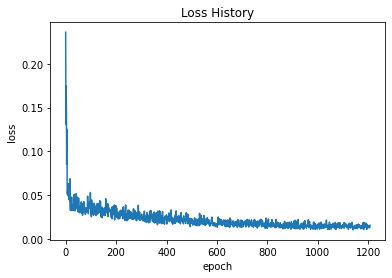

In [49]:

# add the addition epochs to the  training history
train_hist.history['loss'].extend(train_hist_addn.history['loss'])   
plot_loss(train_hist)

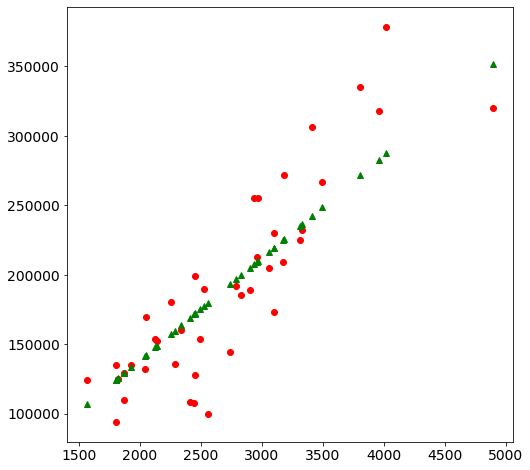

In [50]:
# Visualize data and regression line for learned weights
price_predicted_scaled =  model.predict(sf_train_scaled)
visualize_data(sf_scaler.inverse_transform(sf_train_scaled), 
               price_scaler.inverse_transform(price_train_scaled),
               sf_scaler.inverse_transform(sf_train_scaled), 
               price_scaler.inverse_transform(price_predicted_scaled),
               add_addn_reg_line=False)

prediction mean squared error: 0.01916874713426913

Green triangles are Test square footage with predicted Price


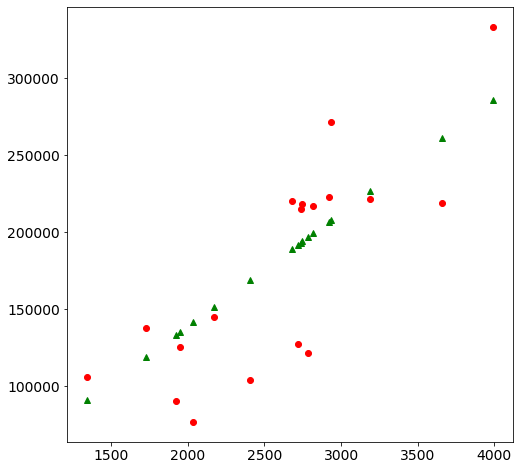


 predicted values fit the data well!


In [53]:

# Make a price prediction on data ie the test dataset
price_test_pred_scaled = model.predict(sf_test_scaled)

# calculate the mean squared error for the prediction, lower is better
from sklearn.metrics import mean_squared_error
print("prediction mean squared error:", 
          mean_squared_error(price_test_scaled, price_test_pred_scaled ))

# Visualize data
print('\nGreen triangles are Test square footage with predicted Price')
visualize_data(sf_scaler.inverse_transform(sf_test_scaled),
               price_scaler.inverse_transform(price_test_scaled),
               sf_scaler.inverse_transform(sf_test_scaled), 
               price_scaler.inverse_transform(price_test_pred_scaled),
               add_addn_reg_line=False)
print('\n predicted values fit the data well!')